# Intro

**This code snippet calculates and prints four common metrics used to evaluate the performance of a predictive model:**

**Mean Squared Error (MSE):**

**MSE measures the average squared difference between the actual and predicted values.
Lower values indicate better model performance, with 0 being the best possible score.
It's sensitive to outliers because of the squaring operation.
Mean Absolute Error (MAE):**

**MAE measures the average absolute difference between the actual and predicted values.
Like MSE, lower values indicate better performance, with 0 being ideal.
It's less sensitive to outliers compared to MSE because it doesn't involve squaring.
Mean Absolute Percentage Error (MAPE):**

**MAPE calculates the average percentage difference between the actual and predicted values.
It's often used in forecasting to understand the accuracy of predictions relative to the actual values.
Lower values are desirable, but MAPE has limitations, especially when actual values are close to zero.
Root Mean Squared Error (RMSE):**

**RMSE is the square root of the MSE.
It's another measure of the differences between predicted and actual values, providing a similar interpretation to MAE but giving more weight to large errors.
Like MSE, lower values indicate better model performance.
These metrics help assess how well a model generalizes to new data and are crucial for comparing different models or tuning hyperparameters to improve performance.**

# 1. Import

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.preprocessing import LabelEncoder,PowerTransformer

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/coffee-shop-sales/Coffee Shop Sales.xlsx


In [2]:
df = pd.read_excel("/kaggle/input/coffee-shop-sales/Coffee Shop Sales.xlsx")
df

,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail
0,1,2023-01-01,07:06:11,2,5,Lower Manhattan,32,3.00,Coffee,Gourmet brewed coffee,Ethiopia Rg
1,2,2023-01-01,07:08:56,2,5,Lower Manhattan,57,3.10,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg
2,3,2023-01-01,07:14:04,2,5,Lower Manhattan,59,4.50,Drinking Chocolate,Hot chocolate,Dark chocolate Lg
3,4,2023-01-01,07:20:24,1,5,Lower Manhattan,22,2.00,Coffee,Drip coffee,Our Old Time Diner Blend Sm
4,5,2023-01-01,07:22:41,2,5,Lower Manhattan,57,3.10,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg
...,...,...,...,...,...,...,...,...,...,...,...
149111,149452,2023-06-30,20:18:41,2,8,Hell's Kitchen,44,2.50,Tea,Brewed herbal tea,Peppermint Rg
149112,149453,2023-06-30,20:25:10,2,8,Hell's Kitchen,49,3.00,Tea,Brewed Black tea,English Breakfast Lg
149113,149454,2023-06-30,20:31:34,1,8,Hell's Kitchen,45,3.00,Tea,Brewed herbal tea,Peppermint Lg
149114,149455,2023-06-30,20:57:19,1,8,Hell's Kitchen,40,3.75,Coffee,Barista Espresso,Cappuccino


# 2. Check Null Values And Duplicate Values

In [3]:
df.isnull().sum()

transaction_id      0
transaction_date    0
transaction_time    0
transaction_qty     0
store_id            0
store_location      0
product_id          0
unit_price          0
product_category    0
product_type        0
product_detail      0
dtype: int64

In [4]:
df.duplicated().sum()

0

# 3. Preparing Data

In [5]:
df.drop(columns=["store_id", "transaction_id","product_id"], inplace=True)
df.head()

,transaction_date,transaction_time,transaction_qty,store_location,unit_price,product_category,product_type,product_detail
0,2023-01-01,07:06:11,2,Lower Manhattan,3.0,Coffee,Gourmet brewed coffee,Ethiopia Rg
1,2023-01-01,07:08:56,2,Lower Manhattan,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg
2,2023-01-01,07:14:04,2,Lower Manhattan,4.5,Drinking Chocolate,Hot chocolate,Dark chocolate Lg
3,2023-01-01,07:20:24,1,Lower Manhattan,2.0,Coffee,Drip coffee,Our Old Time Diner Blend Sm
4,2023-01-01,07:22:41,2,Lower Manhattan,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg


In [6]:
df.dtypes

transaction_date    datetime64[ns]
transaction_time            object
transaction_qty              int64
store_location              object
unit_price                 float64
product_category            object
product_type                object
product_detail              object
dtype: object

In [7]:
df["product_category"].value_counts()

product_category
Coffee                58416
Tea                   45449
Bakery                22796
Drinking Chocolate    11468
Flavours               6790
Coffee beans           1753
Loose Tea              1210
Branded                 747
Packaged Chocolate      487
Name: count, dtype: int64

In [8]:
encoder = LabelEncoder()
df["product_category"]=encoder.fit_transform(df["product_category"])
df["product_type"]=encoder.fit_transform(df["product_type"])
df["product_detail"]=encoder.fit_transform(df["product_detail"])
df["store_location"]=encoder.fit_transform(df["store_location"])
df.head()

,transaction_date,transaction_time,transaction_qty,store_location,unit_price,product_category,product_type,product_detail
0,2023-01-01,07:06:11,2,2,3.0,2,13,32
1,2023-01-01,07:08:56,2,2,3.1,8,4,71
2,2023-01-01,07:14:04,2,2,4.5,4,17,20
3,2023-01-01,07:20:24,1,2,2.0,2,10,60
4,2023-01-01,07:22:41,2,2,3.1,8,4,71


In [9]:
df.dtypes

transaction_date    datetime64[ns]
transaction_time            object
transaction_qty              int64
store_location               int64
unit_price                 float64
product_category             int64
product_type                 int64
product_detail               int64
dtype: object

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from datetime import datetime

df.drop(columns=["transaction_time"], inplace=True)
df.head()

,transaction_date,transaction_qty,store_location,unit_price,product_category,product_type,product_detail
0,2023-01-01,2,2,3.0,2,13,32
1,2023-01-01,2,2,3.1,8,4,71
2,2023-01-01,2,2,4.5,4,17,20
3,2023-01-01,1,2,2.0,2,10,60
4,2023-01-01,2,2,3.1,8,4,71


In [11]:
df['year'] = df['transaction_date'].dt.year
df['month'] = df['transaction_date'].dt.month
df['day'] = df['transaction_date'].dt.day
df.drop(columns=["transaction_date"], inplace=True)
df.head()

,transaction_qty,store_location,unit_price,product_category,product_type,product_detail,year,month,day
0,2,2,3.0,2,13,32,2023,1,1
1,2,2,3.1,8,4,71,2023,1,1
2,2,2,4.5,4,17,20,2023,1,1
3,1,2,2.0,2,10,60,2023,1,1
4,2,2,3.1,8,4,71,2023,1,1


In [12]:
df.dtypes

transaction_qty       int64
store_location        int64
unit_price          float64
product_category      int64
product_type          int64
product_detail        int64
year                  int32
month                 int32
day                   int32
dtype: object

# 4. Processing Data

In [13]:
X=df[["transaction_qty","store_location","product_category","product_type","product_detail","month","day","year"]]
y=df["unit_price"]

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [15]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = pd.DataFrame(scaler.fit_transform(X_train), columns = X.columns)

X_test = pd.DataFrame(scaler.transform(X_test), columns = X.columns)

In [16]:
X_train.head()

,transaction_qty,store_location,product_category,product_type,product_detail,month,day,year
0,-0.808337,0.022206,1.371238,-0.837675,1.669623,-1.186922,-0.420977,0.0
1,-0.808337,0.022206,-1.288568,1.622432,-0.951760,0.604794,-1.352233,0.0
2,2.872549,1.253164,0.041335,0.552820,-0.824919,-1.784161,0.626685,0.0
3,-0.808337,0.022206,-1.288568,-1.158559,-1.290003,-0.589684,0.859499,0.0
4,-0.808337,0.022206,-1.288568,1.194587,-1.247723,1.202032,-1.701453,0.0


# 5. Calculations

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
X = df.drop('year', axis=1)  # we will not use the 'year' column as a target variable
y = df['year']

# Dividing data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling data with standard scaling (StandardScaler)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create and train the RandomForestClassifier model
model = RandomForestClassifier()
model.fit(X_train_scaled, y_train)

# Make predictions using the model
predictions = model.predict(X_test_scaled)

# Calculate accuracy score
accuracy = accuracy_score(y_test, predictions)
print("accuracy:", accuracy)

accuracy: 1.0


In [18]:
predictions_df = pd.DataFrame({'Actual Values': y_test, 'Estimated Values': predictions})
predictions_df

,Actual Values,Estimated Values
116605,2023,2023
119259,2023,2023
105265,2023,2023
29485,2023,2023
126885,2023,2023
...,...,...
40034,2023,2023
109854,2023,2023
84119,2023,2023
119722,2023,2023


In [19]:
df.head()

,transaction_qty,store_location,unit_price,product_category,product_type,product_detail,year,month,day
0,2,2,3.0,2,13,32,2023,1,1
1,2,2,3.1,8,4,71,2023,1,1
2,2,2,4.5,4,17,20,2023,1,1
3,1,2,2.0,2,10,60,2023,1,1
4,2,2,3.1,8,4,71,2023,1,1


In [20]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error

X = df.drop('unit_price', axis=1)
y = df['unit_price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the RandomForestRegressor model
model = RandomForestRegressor()
model.fit(X_train, y_train)

# Make predictions using the model
predictions = model.predict(X_test)

# Calculating Mean Squared Error (MSE)
mse = mean_squared_error(y_test, predictions)
print("Mean Square Error (MSE):", mse)

# Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, predictions)
print("Mean Absolute Error (MAE):", mae)

# Mean Absolute Percentage Error (MAPE)
mape = mean_absolute_percentage_error(y_test, predictions)
print("Mean Absolute Percentage Error (MAPE):", mape)

# Root Mean Square Error (RMSE)
rmse = mean_squared_error(y_test, predictions, squared=False)
print("Root Mean Square Error (RMSE):", rmse)

Mean Square Error (MSE): 0.023184668521447363
Mean Absolute Error (MAE): 0.007299912030424577
Mean Absolute Percentage Error (MAPE): 0.0020000806351013548
Root Mean Square Error (RMSE): 0.15226512575585838


In [21]:
predictions_df2 = pd.DataFrame({'Actual Values': y_test, 'Estimated Values': predictions})
predictions_df2

,Actual Values,Estimated Values
116605,3.75,3.75
119259,3.75,3.75
105265,3.00,3.00
29485,3.75,3.75
126885,3.75,3.75
...,...,...
40034,4.00,4.00
109854,0.80,0.80
84119,3.00,3.00
119722,3.75,3.75


In [22]:
clf=pd.DataFrame(predictions).value_counts()

# 6. Visualizations

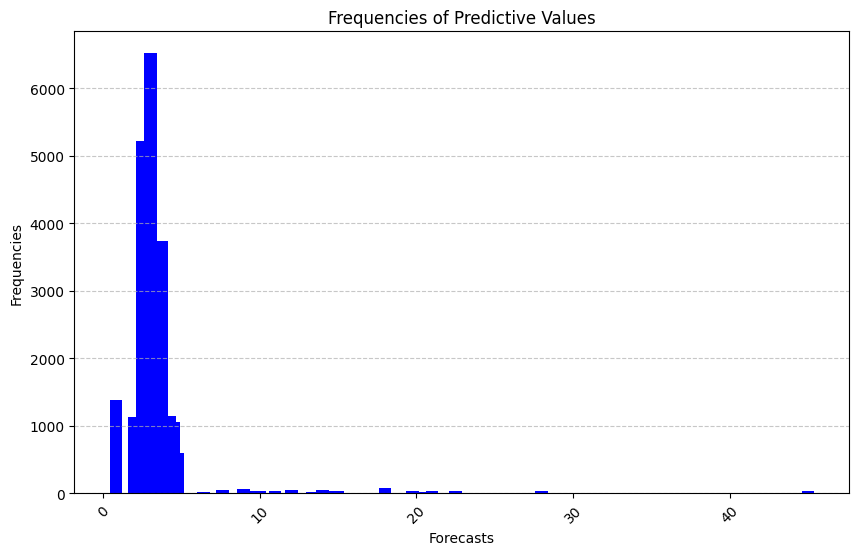

In [23]:
import matplotlib.pyplot as plt

clf = pd.DataFrame(predictions, columns=["forecast"]).value_counts().reset_index()
clf.columns = ["forecast", "Frequency"]

# Draw a bar chart
plt.figure(figsize=(10, 6))
plt.bar(clf["forecast"], clf["Frequency"], color='blue')
plt.xlabel("Forecasts")
plt.ylabel("Frequencies")
plt.title("Frequencies of Predictive Values")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

year



/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:645: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  g_vals = grouped_vals.get_group(g)


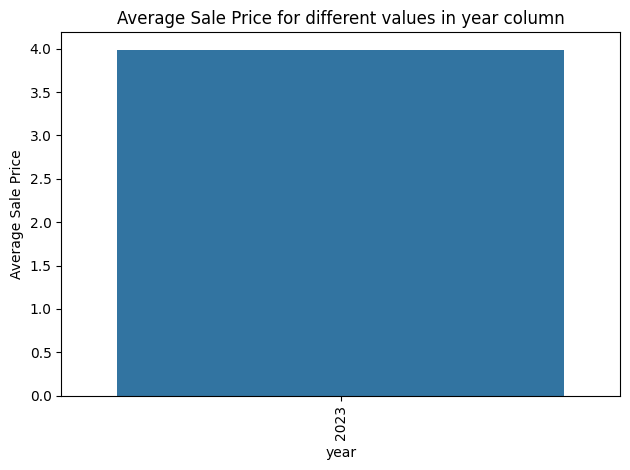

month



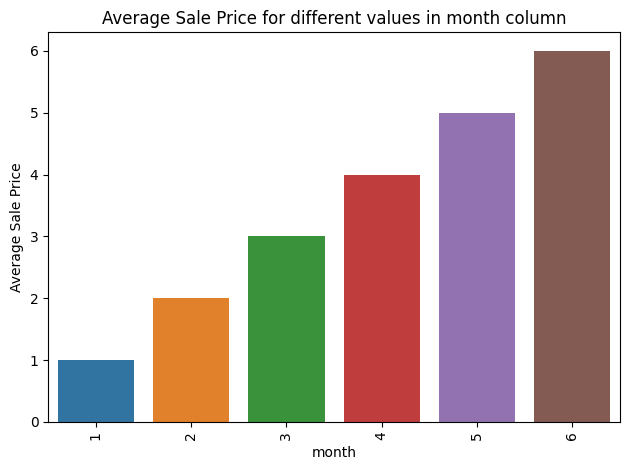

day



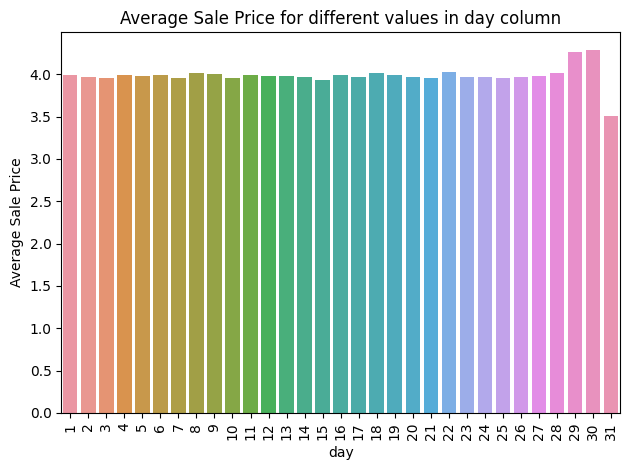

In [24]:
import seaborn as sns
categ_col = df.select_dtypes(include = ['int32']).columns
categ_col
for col in categ_col:
    print(f"{col}\n")
    labels = df[col].unique()
    prices=[]
    for label in labels: 
          price = df.loc[df[col] == label,'month'].mean()
          prices.append(price)
    sns.barplot(x = labels,y = prices)
    plt.title(f"Average Sale Price for different values in {col} column")
    plt.xlabel(col)
    plt.ylabel('Average Sale Price')
    plt.xticks(rotation = 90)
    plt.tight_layout()
    plt.show()

# 7. Result

**1- Mean Squared Error (MSE): The MSE value of 0.0232 indicates that, on average, the squared difference between the actual and predicted values is approximately 0.0232. Since MSE is a measure of the average squared difference, lower values imply better model performance. In this case, the relatively low MSE suggests that the model's predictions are generally close to the actual values.**

**2- Mean Absolute Error (MAE): With an MAE of 0.0073, it means that, on average, the absolute difference between the actual and predicted values is around 0.0073. MAE is less sensitive to outliers compared to MSE because it does not involve squaring the errors. Therefore, a low MAE indicates that the model's predictions are, on average, close to the actual values.**

**3- Mean Absolute Percentage Error (MAPE): The MAPE value of 0.0020 indicates that, on average, the percentage difference between the actual and predicted values is approximately 0.2%. MAPE is particularly useful for understanding the accuracy of predictions relative to the actual values. A lower MAPE suggests that the model's predictions are closer to the actual values, with 0 being a perfect score.**

**4- Root Mean Square Error (RMSE): The RMSE value of 0.1524 is the square root of the MSE. It provides a measure of the average magnitude of the errors in the predicted values. Like MSE, lower RMSE values indicate better model performance. In this case, the relatively low RMSE further confirms that the model's predictions are generally accurate.**

**Overall, based on these metrics, it appears that the model performs well in predicting the target variable, as indicated by the low values of MSE, MAE, MAPE, and RMSE. However, it's essential to consider the specific context of the problem and the domain to determine whether these performance metrics meet the desired criteria for model accuracy.**

![](https://media.giphy.com/media/smaaKxR6ZrQYQxHFfA/giphy.gif?cid=ecf05e47avon9bc048yc6fr5t97v7txhq665j27tfshgt6zu&ep=v1_gifs_search&rid=giphy.gif&ct=g)

**🙏Thanks For Inspecting My Project🙏**